![pexels-pixabay-163016](pexels-pixabay-163016.jpg)


# Reducing the number of high fatality accidents

## 📖 Background
You work for the road safety team within the department of transport and are looking into how they can reduce the number of major incidents. The safety team classes major incidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these major incidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

## 💪 Competition challenge

Create a report that covers the following:

1. What time of day and day of the week do most major incidents happen?
2. Are there any patterns in the time of day/ day of the week when major incidents occur?
3. What characteristics stand out in major incidents compared with other accidents?
4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce major incidents?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 30%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in depth enough but also concise.</li></ul> |
| **Visualizations** | 25% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'./data/accident-data.csv')

In [2]:
df.head(3)

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,3,09:00,6,0,6,20,0,-1,6,0,9,9,1,9,9,0,0,1
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,13:55,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,4,01:25,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1


# **EDA**

In [3]:
# Get information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_index                           91199 non-null  object 
 1   accident_year                            91199 non-null  int64  
 2   accident_reference                       91199 non-null  object 
 3   longitude                                91185 non-null  float64
 4   latitude                                 91185 non-null  float64
 5   accident_severity                        91199 non-null  int64  
 6   number_of_vehicles                       91199 non-null  int64  
 7   number_of_casualties                     91199 non-null  int64  
 8   date                                     91199 non-null  object 
 9   day_of_week                              91199 non-null  int64  
 10  time                                     91199

Observation - Some of the columns - accident reference, date are in the wrong format, so it would be formated properlly. 

In [4]:
df.date

0        04/02/2020
1        27/04/2020
2        01/01/2020
3        01/01/2020
4        01/01/2020
            ...    
91194    12/08/2020
91195    13/11/2020
91196    15/04/2020
91197    15/12/2020
91198    25/08/2020
Name: date, Length: 91199, dtype: object

In [5]:
df.date = pd.to_datetime(df.date)

In [6]:
# Convert the date columns to a datetime from object without time portion.
df['date'] = pd.to_datetime(df['date'].dt.strftime('%Y-%m-%d %H %P'))
df['date']

0       2020-04-02
1       2020-04-27
2       2020-01-01
3       2020-01-01
4       2020-01-01
           ...    
91194   2020-12-08
91195   2020-11-13
91196   2020-04-15
91197   2020-12-15
91198   2020-08-25
Name: date, Length: 91199, dtype: datetime64[ns]

In [7]:
df.tail(1)

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
91198,2020991032575,2020,991032575,-4.56104,56.003843,3,1,1,2020-08-25,3,13:50,6,0,6,30,0,-1,6,0,0,0,1,1,1,0,2,1


In [8]:
# Drop the accident index columns
df.drop("accident_index", axis = 1, inplace = True)

In [9]:
# Drop the null values
df.dropna(inplace = True)

In [10]:
# Check for duplicate
df.duplicated().sum()

0

In [11]:
# Get statistics insights of the dataset
round(df.describe(), 2)

,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
count,91185.0,91185.00,91185.00,91185.00,91185.00,91185.00,91185.00,91185.00,91185.00,91185.00,91185.00,91185.00,91185.00,91185.00,91185.00,91185.00,91185.00,91185.00,91185.00,91185.00,91185.00,91185.00,91185.00
mean,2020.0,-1.19,52.35,2.77,1.84,1.27,4.12,4.22,790.43,5.26,36.27,3.94,1.74,5.55,220.18,0.35,1.19,2.07,1.70,1.39,0.24,0.18,1.32
std,0.0,1.37,1.33,0.46,0.68,0.68,1.93,1.44,1580.57,1.68,13.90,12.61,2.51,1.02,913.62,1.70,2.45,1.75,1.85,0.93,1.32,1.15,0.47
min,2020.0,-7.50,49.97,1.00,1.00,1.00,1.00,1.00,0.00,1.00,-1.00,-1.00,-1.00,1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1.00
25%,2020.0,-2.11,51.46,3.00,1.00,1.00,2.00,3.00,0.00,6.00,30.00,0.00,-1.00,6.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,1.00
50%,2020.0,-1.05,51.76,3.00,2.00,1.00,4.00,4.00,34.00,6.00,30.00,2.00,2.00,6.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,1.00
75%,2020.0,-0.13,53.30,3.00,2.00,1.00,6.00,6.00,538.00,6.00,40.00,3.00,4.00,6.00,0.00,0.00,0.00,4.00,1.00,2.00,0.00,0.00,2.00
max,2020.0,1.76,60.54,3.00,13.00,41.00,7.00,6.00,9174.00,9.00,70.00,99.00,9.00,6.00,9174.00,9.00,9.00,7.00,9.00,9.00,9.00,9.00,2.00


# **Visualization**

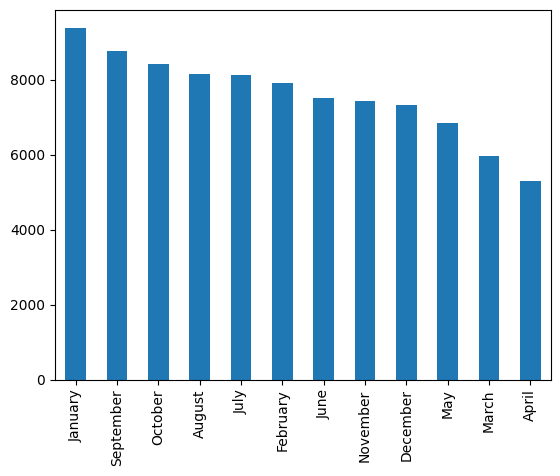

In [12]:
# Finding out the month that recorded most accidents?
accidents_per_month = df["date"].dt.month_name().value_counts().plot(kind="bar")
plt.show()

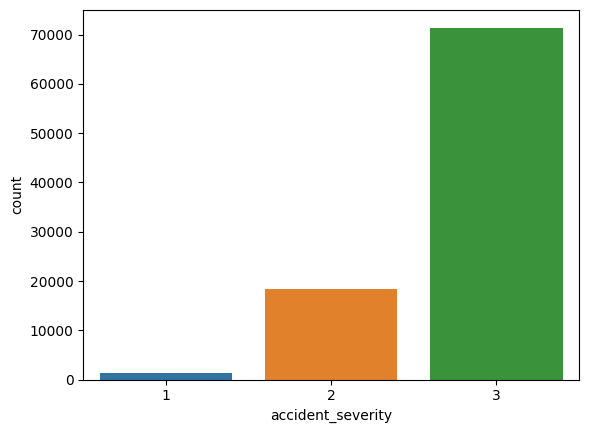

In [13]:
#Visulaizing the severity of the accidents
sns.countplot(data=df, x="accident_severity")
plt.show()

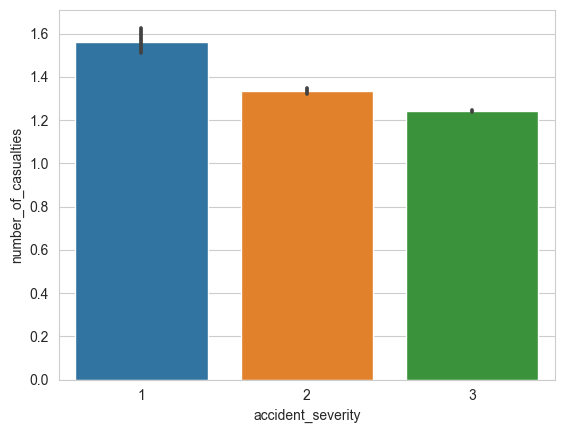

In [14]:
#Visulaizing the type of accident_severity that has highest number of casuality
sns.set_style("whitegrid")
sns.barplot(x="accident_severity", y="number_of_casualties", data=df)
plt.show()

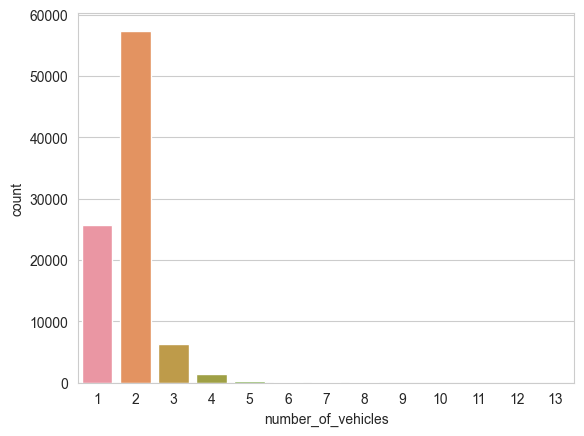

In [15]:
#Visulaizing the highest number of vehicles involved in accidents 
sns.countplot(x="number_of_vehicles", data=df)
plt.show()

## Q1 - What time of day and day of the week do most major incidents happen?

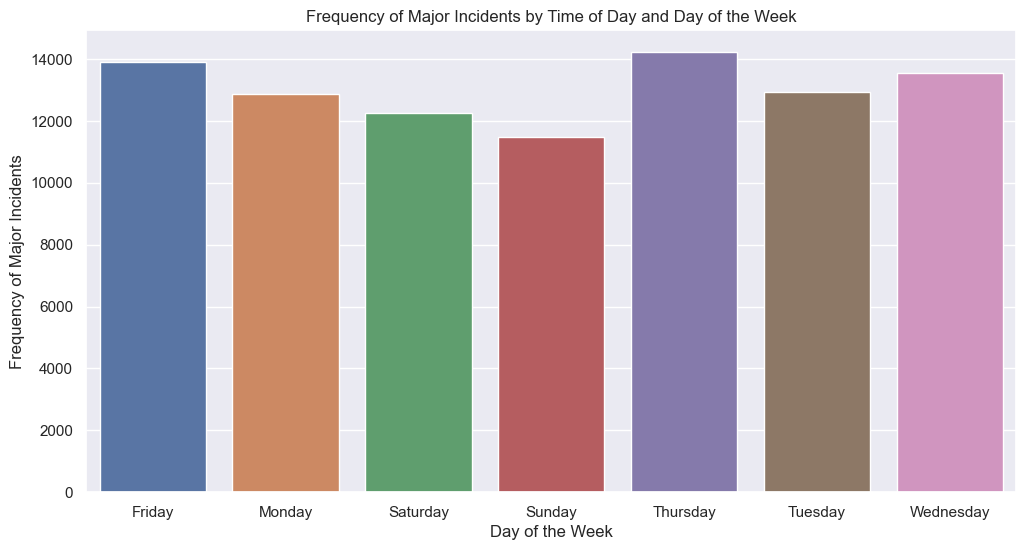

In [16]:
# extract the day of the week and hour of the day
df['Day'] = df['date'].dt.day_name()
df['Hour'] = df['time'].apply(lambda x: int(x.split(':')[0]))

# create a pivot table with the frequency of incidents by day and hour
pivot = df.pivot_table(values='accident_severity', index='Hour', columns='Day', aggfunc='count')

# plot the barplot using seaborn
sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(data=pivot.transpose(), x=pivot.columns, y=pivot.values.sum(axis=0))
plt.xlabel('Day of the Week')
plt.ylabel('Frequency of Major Incidents')
plt.title('Frequency of Major Incidents by Time of Day and Day of the Week')
plt.show()

### Obseravtion: The above visualization shows that the least accidents occur on Saturday and Sunday while major accidents happen on Thursday and Friday. Accidents are higher on weekdays than on weekends, this can be as a result of the people going to work. 

## Q2-  Are there any patterns in the time of day/ day of the week when major incidents occur?

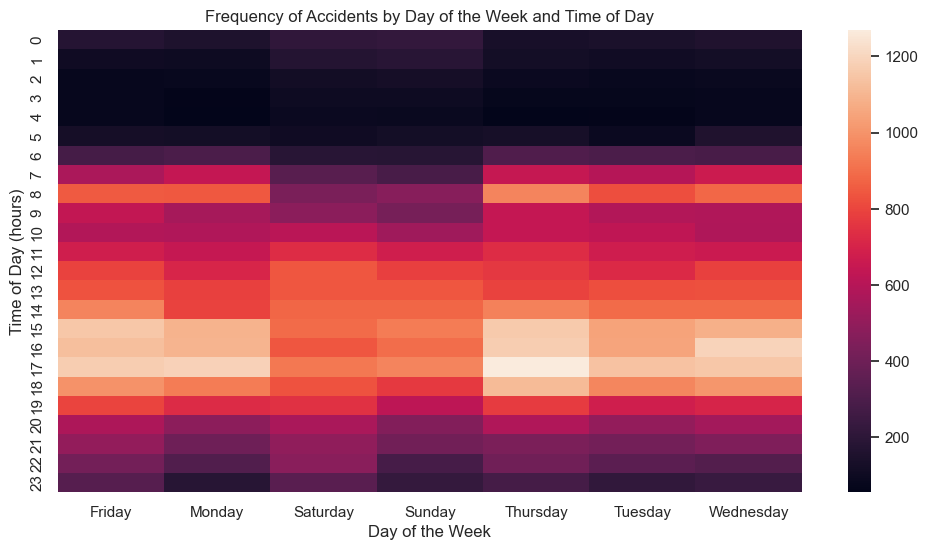

In [17]:
sns.heatmap(data=pivot)

# Customize the plot
plt.xlabel('Day of the Week')
plt.ylabel('Time of Day (hours)')
plt.title('Frequency of Accidents by Day of the Week and Time of Day')

# Show the plot
plt.show()

### **Observation**
## - Most accidents occur between 3pm - 6pm on Friday, Monday, Thursday and Wednesday. 
## - Least accidents occur between 0:00am to 5:00am all through the week. 
## - It is also important to take note that accidents are also likely to happen at 8am during week days
## - At 11pm on Monday, Sunday, Tuesday and Wednesday,there are least accidents on the road

## Q3 - What characteristics stand out in major incidents compared with other accidents?

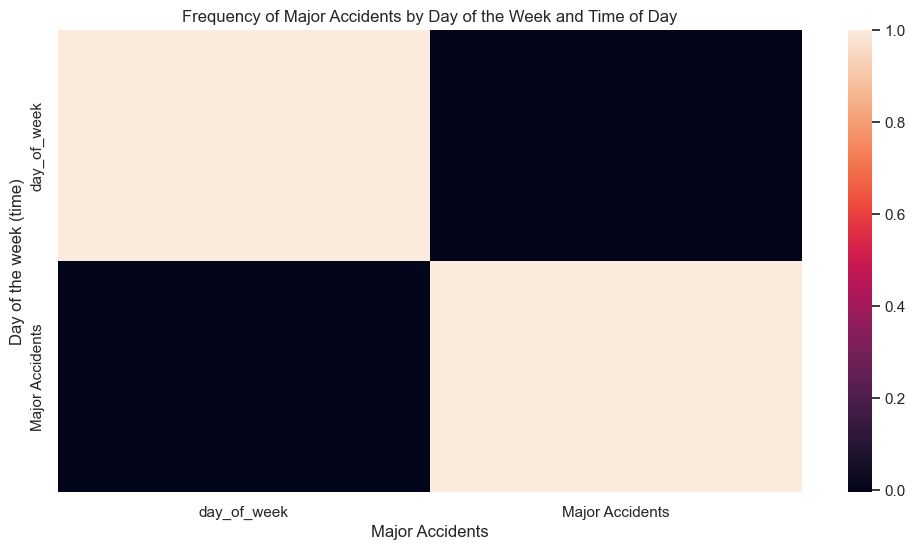

In [18]:
# Create a heatmap of correlations between variables and severity
major_accidents = df[df['number_of_casualties'] > 3]
accidents_per_time = major_accidents.groupby(["day_of_week", "time"])
df2 = accidents_per_time.size().reset_index(name="Major Accidents")

# plot to show correlation between major accidents and day of the week and the time it occurred
sns.heatmap(df2.corr())

# Customize the plot
plt.xlabel('Major Accidents')
plt.ylabel('Day of the week (time)')
plt.title('Frequency of Major Accidents by Day of the Week and Time of Day')

# Show the plot
plt.show()

### Observation: There is no correlation between the frequency of major accidents and the day of the week and time of day when they occur

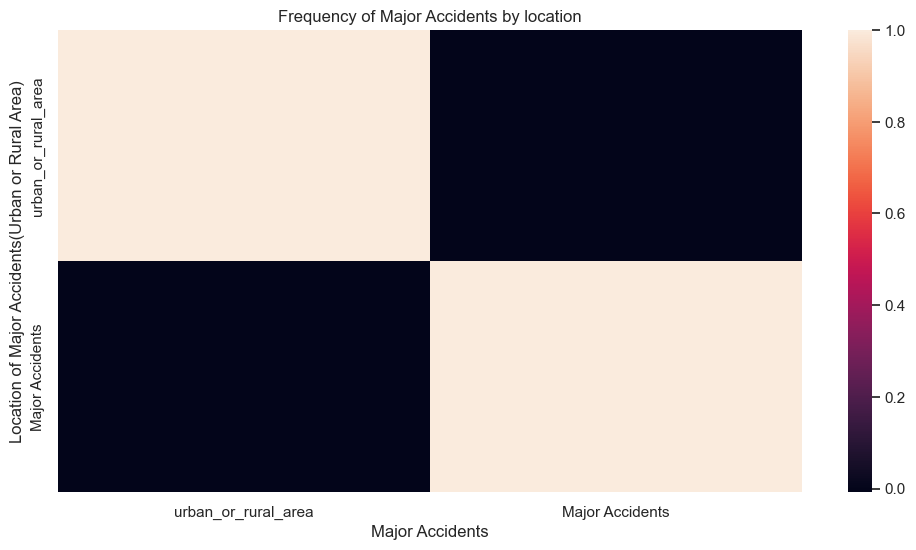

In [19]:
# Create a heatmap of correlations between location(urban and rural area) and accident severity
major_accidents = df[df['number_of_casualties'] > 3]
accidents_per_day = major_accidents["date"].dt.day_name().value_counts()
accidents_per_location_per_day = major_accidents.groupby(["urban_or_rural_area", major_accidents["date"].dt.day_name()])["urban_or_rural_area"].count()

df2 = accidents_per_location_per_day.reset_index(name= 'Major Accidents')

# plot to show correlation between major accidents and day of the week and the time it occurred
sns.heatmap(df2.corr())

# Customize the plot
plt.xlabel('Major Accidents')
plt.ylabel('Location of Major Accidents(Urban or Rural Area)')
plt.title('Frequency of Major Accidents by location')

# Show the plot
plt.show()

### Observation: There is also no correlation between major accidents and the location that it happened.

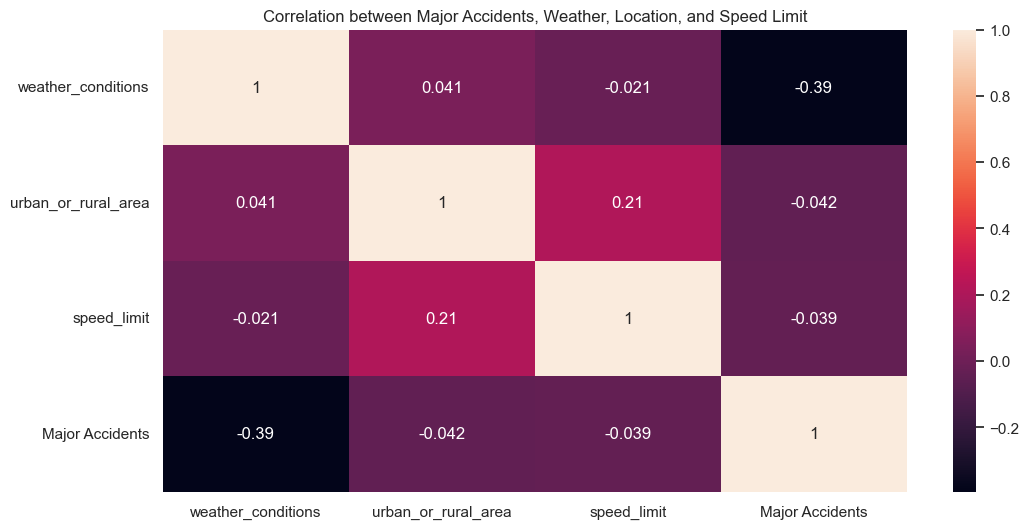

In [20]:
# Create a heatmap of correlations between major accidents, weather conditions, urban or rural area location, and speed limit
major_accidents = df[df['number_of_casualties'] > 3]
accidents_per_location = major_accidents.groupby(["weather_conditions", "urban_or_rural_area", "speed_limit"]).size().reset_index(name='Major Accidents')
corr_matrix = accidents_per_location.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True)

# Customize the plot
#plt.xlabel('Major Accidents')
#plt.ylabel('Location of Major Accidents (Weather, Urban or Rural Area, Speed Limit)')
plt.title('Correlation between Major Accidents, Weather, Location, and Speed Limit')

# Show the plot
plt.show()


### Observation: 
### -There is a weak positive realtionship of 0.21 between speedlimit and urban or rural area
### - There is a weak positive correlation of 0.041 between weather conditions and urban_or_rural_area
### - There are negative relationship between weather conditions, speed limit,locations and major accidents that occur within this period

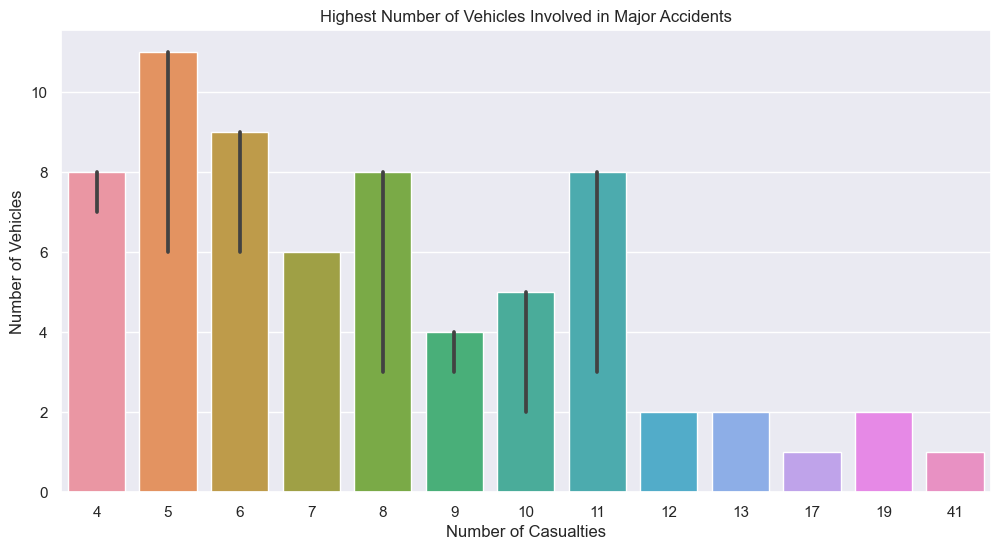

In [21]:
# Visulaizing the highest number of vehicles involved in major accidents 
major_accidents = df[df['number_of_casualties'] > 3]
sns.barplot(x="number_of_casualties", y="number_of_vehicles", data=major_accidents, estimator=max)
plt.title("Highest Number of Vehicles Involved in Major Accidents")
plt.xlabel("Number of Casualties")
plt.ylabel("Number of Vehicles")
plt.show()


## **Observation:**
### The number of vehicles involved in an accident does not neccessarily determine the number of casualties. The highest number of casualties recorded in major accident so far is 5 people and this accident involves 11 vehicles. 

## Q4 - On what areas would you recommend the planning team focus their brainstorming efforts to reduce major incidents?

# Recommendations
## 1. Government should enact polices that encourages hybrid work system for workers to reduce traffic on the road during weekdays
## 2. More attention should be placed on road and traffic rules especially in the month of January, September and October when most accidents occur. 
## 3. Announcments on radio, newspapers and televsion should empahzize strict speed limits especailly between 8am, 3pm-5pm